# MESH Streamflow File Preparation

In [1]:
#!pip uninstall MESH-Scripts-PyLib -y

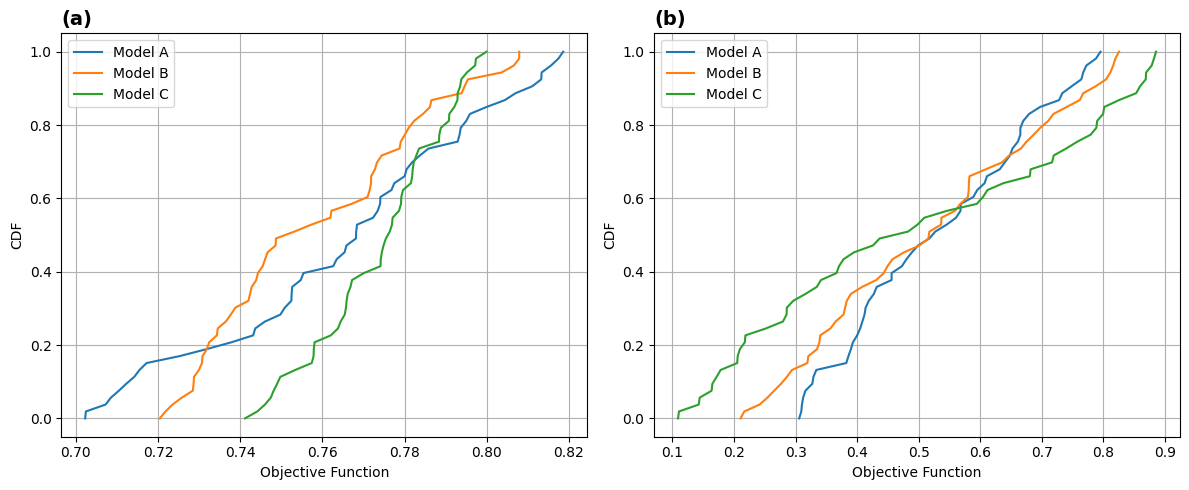

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample setup (replace this with your actual data)
# For example purposes only
np.random.seed(0)
nse_data = {
    'Model A': np.random.uniform(0.7, 0.82, 54),
    'Model B': np.random.uniform(0.72, 0.81, 54),
    'Model C': np.random.uniform(0.74, 0.80, 54),
}

kge_data = {
    'Model A': np.random.uniform(0.3, 0.8, 54),
    'Model B': np.random.uniform(0.2, 0.85, 54),
    'Model C': np.random.uniform(0.1, 0.9, 54),
}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# NSE Plot (Panel a)
for label, values in nse_data.items():
    sorted_vals = np.sort(values)
    cdf = np.linspace(0, 1, len(sorted_vals))
    axes[0].plot(sorted_vals, cdf, label=label)

axes[0].set_title("(a)", loc='left', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Objective Function")
axes[0].set_ylabel("CDF")
axes[0].legend()
axes[0].grid(True)

# KGE Plot (Panel b)
for label, values in kge_data.items():
    sorted_vals = np.sort(values)
    cdf = np.linspace(0, 1, len(sorted_vals))
    axes[1].plot(sorted_vals, cdf, label=label)

axes[1].set_title("(b)", loc='left', fontsize=14, fontweight='bold')
axes[1].set_xlabel("Objective Function")
axes[1].set_ylabel("CDF")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#!pip install owslib

In [ ]:
#!pip install git+https://github.com/MESH-Model/MESH-Scripts-PyLib.git

In [ ]:
from MESHpyPreProcessing.gen_streamflow_file import GenStreamflowFile

gen_flow = GenStreamflowFile()

In [ ]:
station_ca = ["05MA012","05MA016","05JJ003","05MD010","05MD004","05MB003","05MB006","05MB001","05MC001","05JJ009","05MD007","05MA011","05JH005","05MB005","05MJ003","05MG001","05ME006","05JM001","05JM013","05JK008","05JK007","05JK002","05ME012","05ME001","05ME007","05JF001","05JF005","05JF006","05JF011","05JF012","05JE006","05JE001","05JE004","05JG004","05JK004","05JG013","05MD005","05NE003","05JH001","05JM015","05JL005","05JE005","05MF001","05JM010","05ME003","05MF024","05ME010","05MF008","05JG001","05MJ001","05MJ004","05MH006","05MH001","05MH013","05NG001","05NG007","05NG012","05NG021","05NF001","05NF008","05NF002","05NF012","05ND004","05ND013","05NB001","05NB036","05NG003","05NG024","05NB017","05NB040","05NB011","05NB031","05NB027","05NF007","05ND010","05NC001","05MF018","05NB021","05MG004","05NF006","05NA004","05NG020","05NG019","05NG010","05NA005","05ND007","05NA003"]
station_us = ["05112000","05113600","05114000","05116000","05116500"]
start_date = "1980-01-01"
end_date = "2018-01-10"
combined_data_ca, station_info_ca = gen_flow.fetch_hydrometric_data_ca(station_ca, start_date, end_date)
combined_data_us, station_info_us = gen_flow.extract_flow_data_us(station_us, start_date, end_date)

In [ ]:
import pandas as pd
combined_data = pd.merge(combined_data_ca, combined_data_us, on='Date', how='outer')
combined_station_info = station_info_ca + station_info_us
#combined_data = combined_data_ca
#combined_station_info = station_info_ca

In [ ]:
print(station_info_ca)

In [ ]:
gen_flow.write_flow_data_to_file_obstxt('MESH_input_streamflow.txt', combined_data, combined_station_info)

gen_flow.write_flow_data_to_file_ensim('MESH_input_streamflow.tb0', combined_data, combined_station_info)